# demo AB Pic b


This tutorial is intended as a quick start. 


We will use medium resolution VLT/SINFONI K-band data of AB Pic b. These observations and example model were published in [P. Palma-Bifani et al (2023)](https://www.aanda.org/articles/aa/pdf/2023/02/aa44294-22.pdf).

## Imports

In [33]:
# Generic packages
import sys, time, os
import matplotlib.pyplot as plt

# ForMoSA modules
sys.path.insert(0, os.path.abspath('/Users/ppalmabifani/opt/anaconda3/envs/exo_formosa_multi_pip2/lib/python3.11/site-packages/ForMoSA/'))
# For the interpolation & sampling
from ForMoSA.main_utilities import GlobFile
from ForMoSA.adapt.adapt_obs_mod import launch_adapt
from ForMoSA.nested_sampling.nested_sampling import launch_nested_sampling
# For the plots
from ForMoSA.plotting.plotting_class import PlottingForMoSA

## 0. Setup

You need to create a config file with extension <.ini> and modify the parameters. Learn more about our config files in it's specific tutorial.

To initialize ForMoSA we need to read the config.ini file and setup the outputs directory and global parameters as follows

In [34]:
base_path = 'data_abpic/'

# CONFIG_FILE 
# reading and defining global parameters
config_file_path = base_path + 'config_ABPicb.ini'
global_params = GlobFile(config_file_path)    

# Optional: Add "time_now" and "save_name" to avoid overwriting results
time_now = time.strftime("%Y%m%d_%H%M%S")
save_name = 'test'

# Create directory to save the outputs 
global_params.result_path = global_params.result_path+ save_name+'_t' + time_now+'/'
os.makedirs(global_params.result_path)

# Overwrite some parameters
global_params.config.filename = global_params.result_path + 'config_used.ini'
global_params.config['config_path']['result_path']=global_params.result_path
global_params.config.write()


## 1. Interpolate the grid

Once everything is setup, we start by adapting the models and observations. 

The grid of models is interpolated for this, but you don't need to repeat this step once you've adapted the grid for a specific dataset. 

(Answer 'no' only the first time)

In [7]:
# Have you already interpolated the grids for this data? 
y_n_par = 'yes'
#y_n_par = 'no' # Only answer no the first time, then comment to save time

launch_adapt(global_params, justobs=y_n_par)

## 2. Lunch Nested Sampling 

Once the grid is interpolated, we proceed with the nested sampling. For this case we are using the Python package nestle. 

In [8]:
launch_nested_sampling(global_params)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
-> Likelihood functions check-ups

ABPicb_SINFONI_K will be computed with chi2_classic

Done !

it=  1330 logz=-1071.92517042 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
-> Nestle  
 
The code spent 234.33751487731934 sec to run.
niter: 1331
ncall: 13109
nsamples: 1431
logz: -1071.101 +/-  0.347
h: 12.010


 
-> Voilà, on est prêt


## 3. Plotting the outcomes

ForMoSA has been designed with a plotting class. Bellow we show 4 main features: 

- Plotting corner-plots
- Plotting spectra and residuals
- Plotting chains 
- Accessing the different parameters

All plotting functions return the fig object. Therefore you can edit the axes, overplot text/curves, save, etc...

We need to start by initializing the plotting class as follows.

In [26]:
# Path to output file created in the first step
config_file_path_pl = 'data_abpic/outputs/test_t20240807_005025'

# Initialize the plotting class and set the color
plotForMoSA = PlottingForMoSA(config_file_path_pl+'/config_used.ini', 'red')


### PLOT Corner

ForMoSA - Corner plot


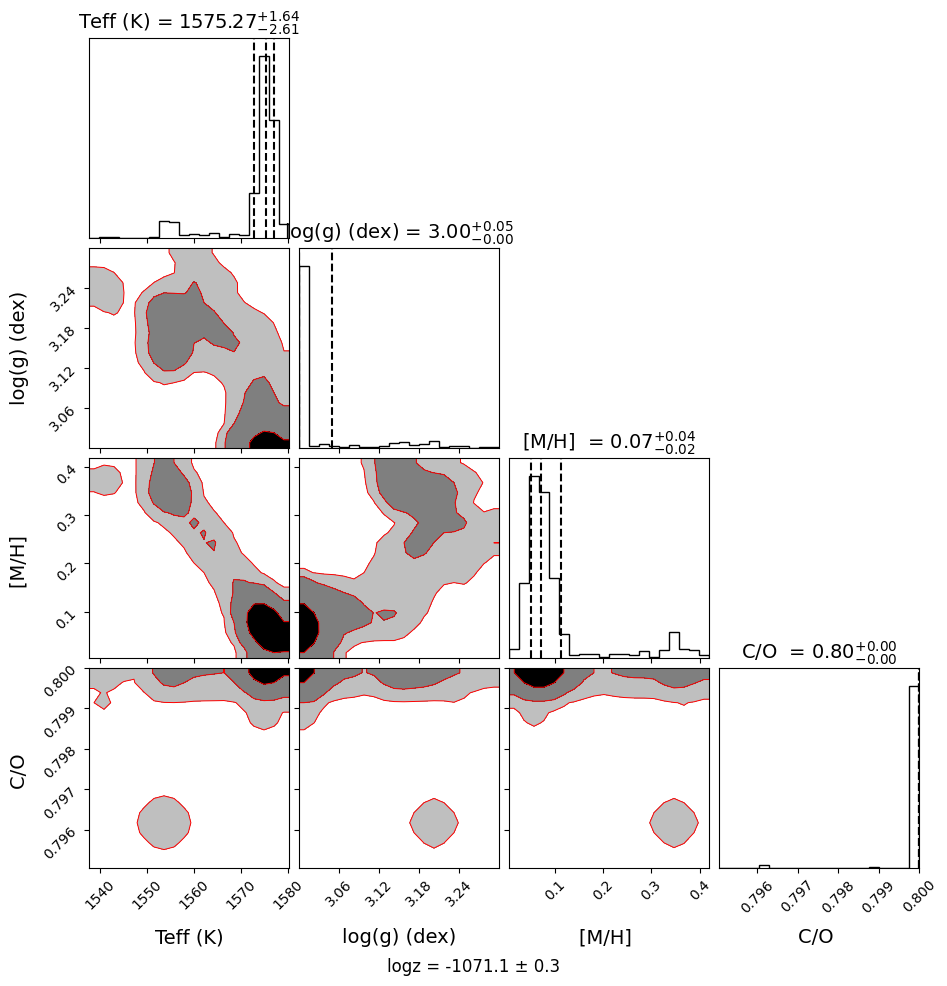

In [27]:
fig = plotForMoSA.plot_corner(levels_sig=[0.997, 0.95, 0.68], bins=20, quantiles=(0.16, 0.5, 0.84), burn_in=1100)
#plt.savefig('') 
plt.show()

### PLOT Spectrum and Residuals

ForMoSA - Best fit and residuals plot


/Users/ppalmabifani/opt/anaconda3/envs/exo_formosa_multi_pip2/lib/python3.11/site-packages/ForMoSA/plotting/plotting_class.py:723: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axr2.legend(frameon=False,handlelength=0)


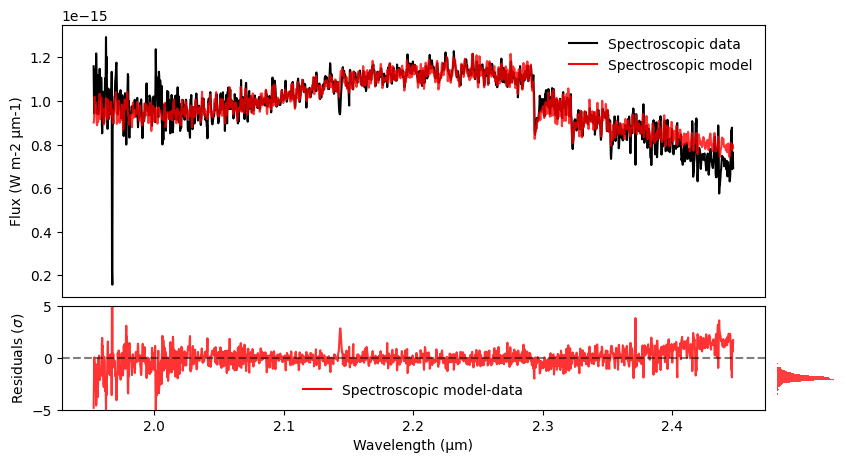

In [32]:
fig, ax, axr, axr2 = plotForMoSA.plot_fit(figsize=(10, 5), uncert='no')

# You can modify the different axes and includ further plotting features
axr.set_ylim(-5,5)

#plt.savefig('')
plt.show()

### PLOT Chains of posteriors

ForMoSA - Posteriors chains for each parameter


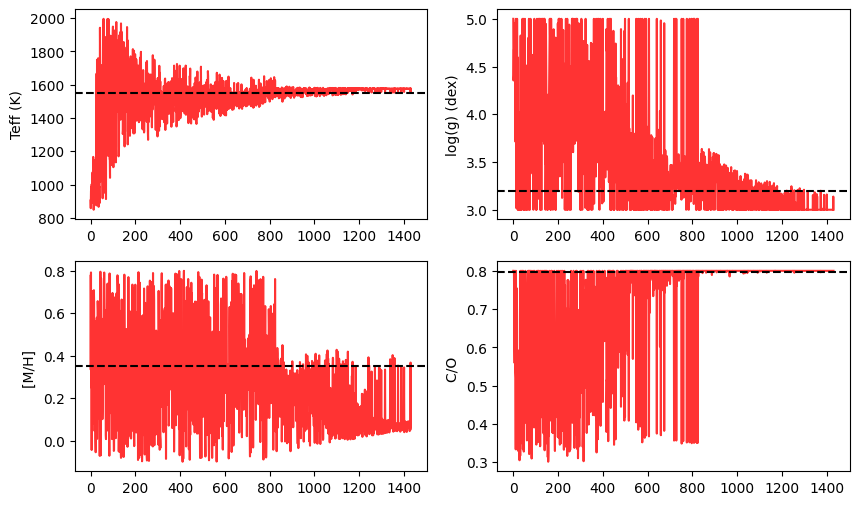

In [29]:
fig, axs = plotForMoSA.plot_chains(figsize=(10,6))
#axs[i, j] #i=cols, j=0,1
#plt.savefig('')
plt.show()

### Access information

You can access different parametes since we are working with a class


In [30]:
posteriors_chains = plotForMoSA.posterior_to_plot
posteriors_names = plotForMoSA.posteriors_names